<a href="https://colab.research.google.com/github/MTahirKleem/Assignment/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression
df = pd.read_csv("GlobalTemperatures.csv")

In [ ]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert the 'Date' column to a datetime index
df['dt'] = pd.to_datetime(df['dt'])

# Check the data types
print(df.dtypes)

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
dtype: object


In [ ]:
# Set the datetime index
df.set_index('dt', inplace=True)

# Fill missing values using linear interpolation
df['LandAverageTemperature'].interpolate(method='linear', inplace=True)


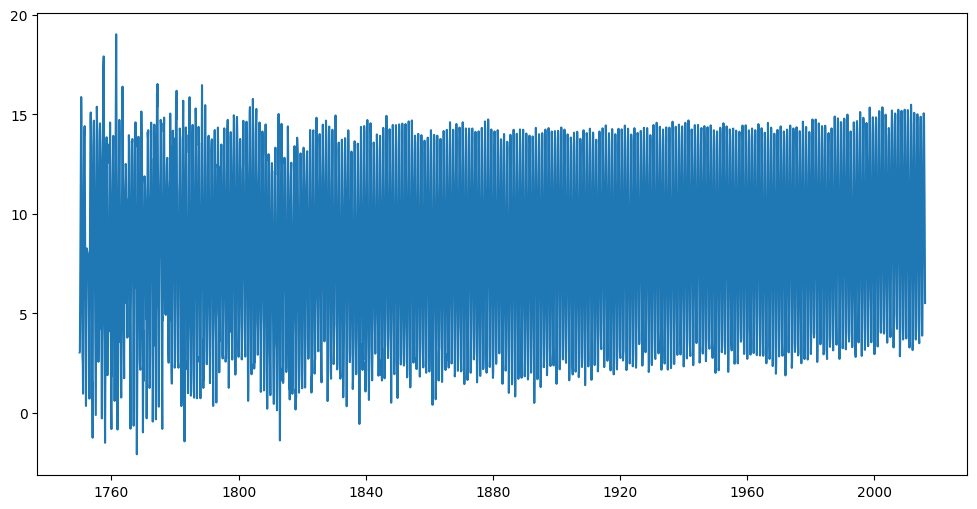

In [ ]:
# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LandAverageTemperature'], label='Land Average Temperature')


<Figure size 1200x800 with 0 Axes>

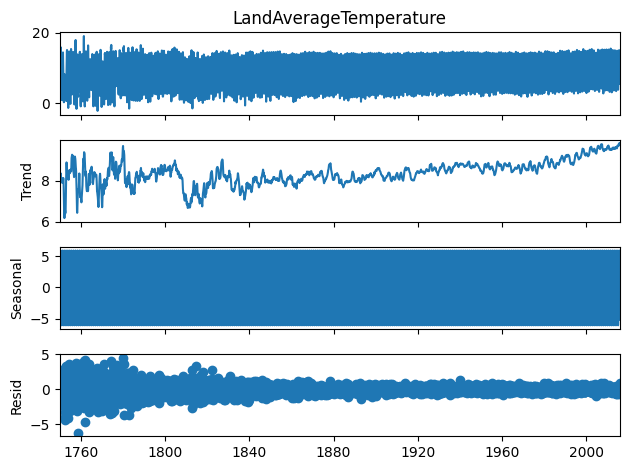

In [ ]:
# Perform seasonal decomposition
result = seasonal_decompose(df['LandAverageTemperature'], model='additive', extrapolate_trend='freq')

# Plot the decomposition results
plt.figure(figsize=(12, 8))
result.plot()
plt.show()


In [ ]:
# Perform seasonal decomposition with the appropriate period
ss_decomposition = seasonal_decompose(df['LandAverageTemperature'], model='additive', period=12)

# Extract components
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid


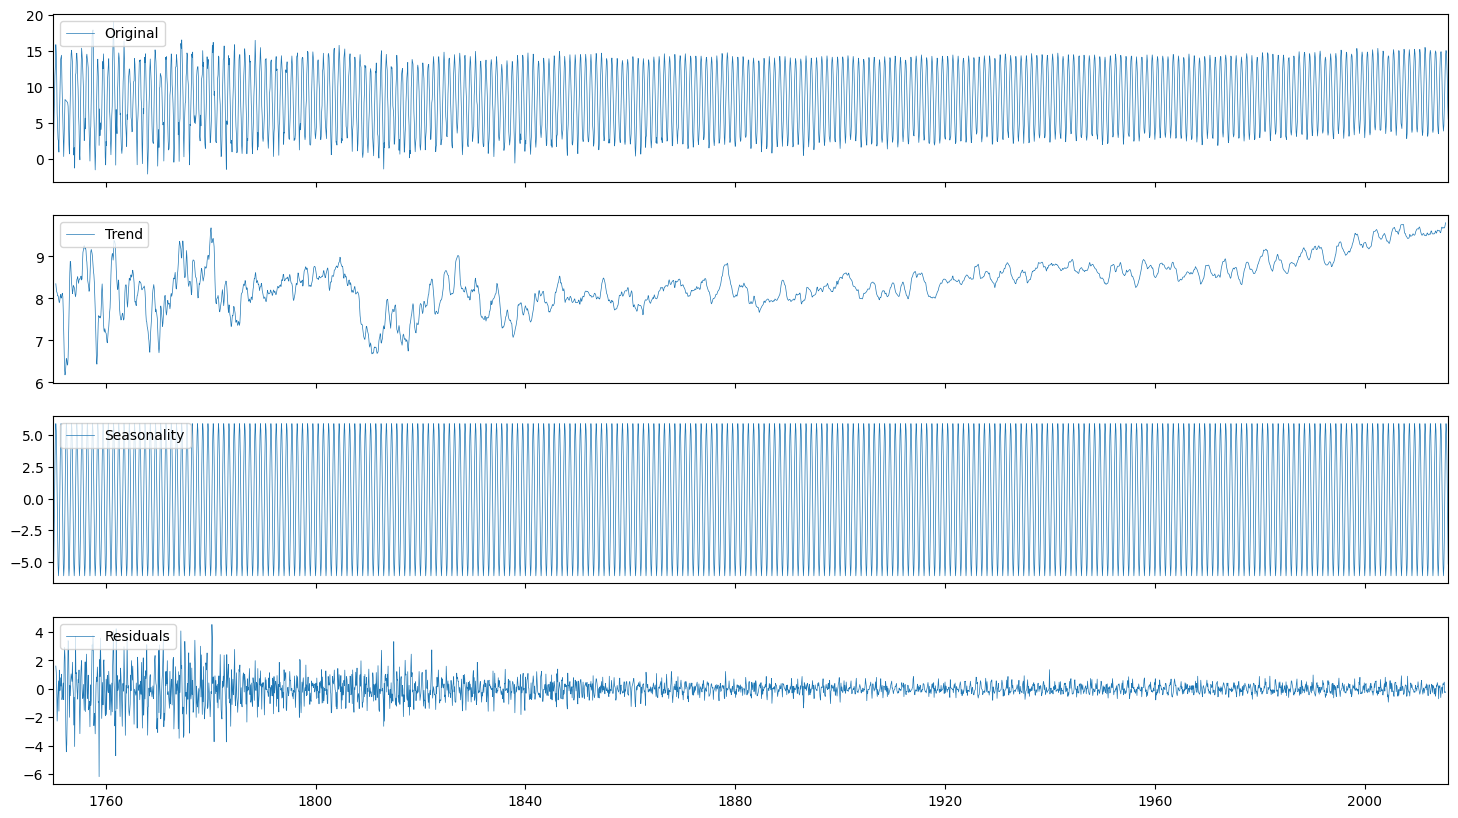

In [ ]:
# Plot the components
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(18, 10))
thickness = 0.5

# Plot Original
axes[0].plot(df.index, df['LandAverageTemperature'], label='Original', linewidth=thickness)
axes[0].legend(loc='upper left')
axes[0].set_xlim([df.index.min(), df.index.max()])

# Plot Trend
axes[1].plot(df.index, estimated_trend, label='Trend', linewidth=thickness)
axes[1].legend(loc='upper left')
axes[1].set_xlim([df.index.min(), df.index.max()])

# Plot Seasonality
axes[2].plot(df.index, estimated_seasonal, label='Seasonality', linewidth=thickness)
axes[2].legend(loc='upper left')
axes[2].set_xlim([df.index.min(), df.index.max()])

# Plot Residuals
axes[3].plot(df.index, estimated_residual, label='Residuals', linewidth=thickness)
axes[3].legend(loc='upper left')
axes[3].set_xlim([df.index.min(), df.index.max()])

plt.show()


In [ ]:
# Perform seasonal decomposition with the appropriate period
ss_decomposition = seasonal_decompose(df['LandAverageTemperature'], model='additive', period=12)

# Extract the trend component (for forecasting)
trend = ss_decomposition.trend.dropna()


In [ ]:
# Use auto_arima to select the best ARIMA model
arima_model = auto_arima(trend, seasonal=True, m=12, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the ARIMA model
arima_model.fit(trend)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=36.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-7467.823, Time=0.59 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-10274.690, Time=5.73 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=9.01 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-7469.704, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-9488.520, Time=0.65 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-10539.339, Time=17.31 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=30.64 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=9.16 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-8482.127, Time=12.48 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=-11095.058, Time=21.80 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-10859.454, Time=7.66 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=40.32 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=14.44 sec
 ARIMA(3,1,0)(2,0,0)[12] inter

ARIMA(order=(4, 1, 1), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True)

<ipython-input-24-b5c1368e8ed6>:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=trend.index[-1], periods=13, closed='right')


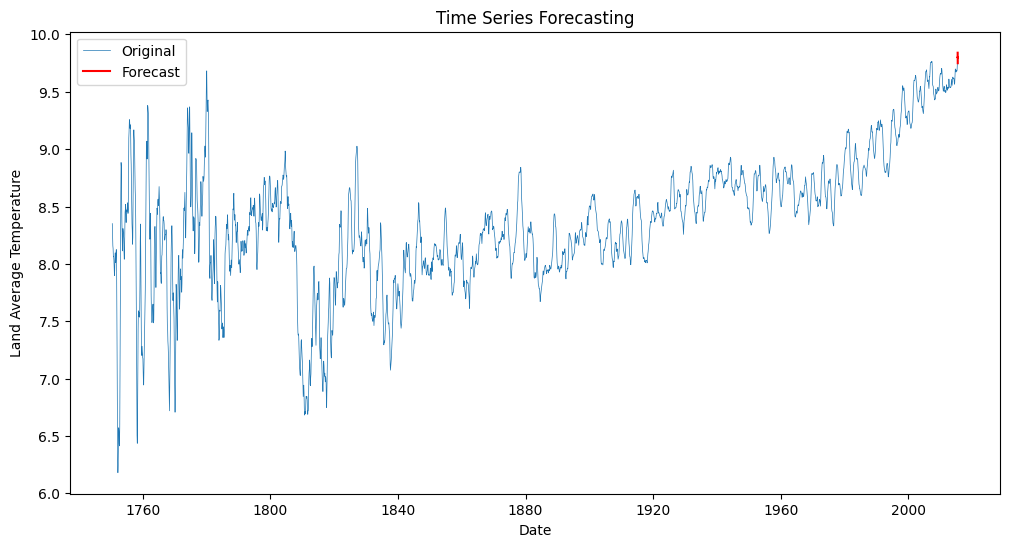

In [ ]:
# Forecast future values (e.g., next 12 months)
forecast_values, conf_int = arima_model.predict(n_periods=12, return_conf_int=True)

# Create a DataFrame for the forecast
forecast_dates = pd.date_range(start=trend.index[-1], periods=13, closed='right')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast_values})

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(trend.index, trend, label='Original', linewidth=0.5)
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast', color='red')
plt.legend(loc='upper left')
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Land Average Temperature')
plt.show()
